# Network Community Detection

## Karate Club Problem

Network representation

In [1]:
from QHyper.problems.community_detection import KarateClubNetwork


karate_club_network = KarateClubNetwork

<class 'networkx.utils.decorators.argmap'> compilation 5:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Louvain community detection algorithm (networkx impl.)

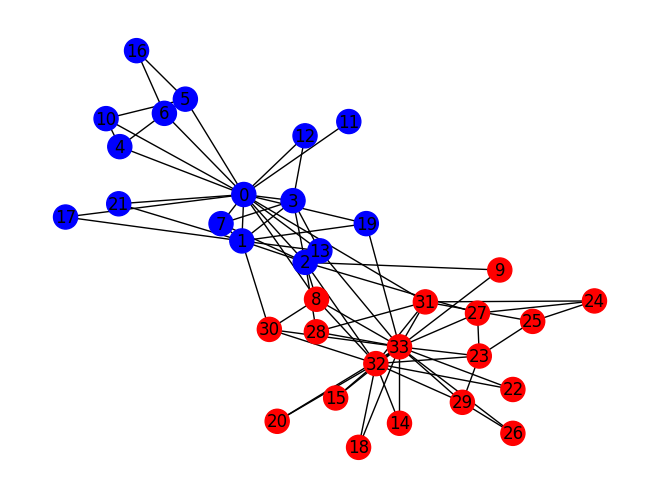

In [2]:
from networkx import community as nx_comm
import networkx as nx


lcda_communities = nx_comm.louvain_communities(
    karate_club_network.graph, seed=5345, resolution=0.5
)  # seed=None

color_map = []
for node in karate_club_network.graph:
    if node in lcda_communities[0]:
        color_map.append("blue")
    else:
        color_map.append("red")

nx.draw(karate_club_network.graph, node_color=color_map, with_labels=True)

### Create Community Detection Problem instance

#### Sympy Expression syntax

In [18]:
from QHyper.problems.community_detection import (
    CommunityDetectionProblem,
    ObjFunFormula,
)


karate_club_problem_sympy = CommunityDetectionProblem(
    karate_club_network, N_communities=2
)
karate_club_problem_sympy.objective_function

-0.0769230769230769*x0*x1 - 0.692307692307692*x0*x10 - 0.897435897435897*x0*x11 - 0.794871794871795*x0*x12 - 0.487179487179487*x0*x13 + 0.205128205128205*x0*x14 + 0.205128205128205*x0*x15 + 0.205128205128205*x0*x16 - 0.794871794871795*x0*x17 + 0.205128205128205*x0*x18 - 0.692307692307692*x0*x19 + 0.0256410256410255*x0*x2 + 0.205128205128205*x0*x20 - 0.794871794871795*x0*x21 + 0.205128205128205*x0*x22 + 0.512820512820513*x0*x23 + 0.307692307692308*x0*x24 + 0.307692307692308*x0*x25 + 0.205128205128205*x0*x26 + 0.41025641025641*x0*x27 + 0.307692307692308*x0*x28 + 0.41025641025641*x0*x29 - 0.384615384615385*x0*x3 + 0.41025641025641*x0*x30 - 0.384615384615385*x0*x31 + 1.23076923076923*x0*x32 + 1.74358974358974*x0*x33 - 0.692307692307692*x0*x4 - 0.58974358974359*x0*x5 - 0.58974358974359*x0*x6 - 0.58974358974359*x0*x7 - 0.487179487179487*x0*x8 + 0.205128205128205*x0*x9 + 0.173076923076923*x1*x10 + 0.0576923076923077*x1*x11 + 0.115384615384615*x1*x12 - 0.711538461538462*x1*x13 + 0.115384615384

##### DQM

In [20]:
from QHyper.solvers.dqm import DQM


karate_dqm = DQM(karate_club_problem_sympy, time=5)
karate_sampleset_dqm_sympy = karate_dqm.solve()

In [22]:
karate_dqm_sample_sympy = karate_sampleset_dqm_sympy.first

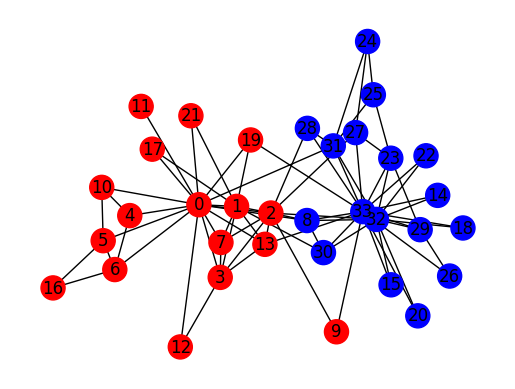

In [23]:
from QHyper.problems.network_communities.utils import draw_communities


folder = "./demo_output"
data_name = "karate_club"
path = f"{folder}/{data_name}.png"

draw_communities(
    karate_club_problem_sympy, karate_dqm_sample_sympy.sample, path
)

Differences with Louvain algorithm

In [10]:
def communities_from_sample(sample, N_communities: int) -> set:
    communities = []
    for k in range(N_communities):
        comm = []
        for i in sample:
            if sample[i] == k:
                comm.append(i)
        communities.append(set(comm))

    return communities

In [24]:
karate_communities_dqm = communities_from_sample(
    karate_dqm_sample_sympy.sample, 2
)

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nDiff.:")
# print(karate_communities_dqm[0].difference(lcda_communities_xs[0]))
print(karate_communities_dqm[1].difference(lcda_communities_xs[0]))


LCDA
comm. 0: {'x3', 'x17', 'x19', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x21', 'x10', 'x12', 'x4', 'x7', 'x0'}
comm. 1: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x18', 'x26', 'x9', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}

DQM
comm. 0: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x18', 'x26', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}
comm. 1: {'x3', 'x21', 'x17', 'x9', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x19', 'x10', 'x12', 'x4', 'x7', 'x0'}

Diff.:
{'x9'}


In [30]:
from QHyper.problems.network_communities.utils import (
    ResultsFrame,
    draw_communities,
)


nodes = karate_club_problem_sympy.G.nodes
values = [
    list(karate_dqm_sample_sympy.sample.values()),
    ResultsFrame()
    .louvain_communities_to_sample_like(lcda_communities)
    .values(),
]
values = [values[0], [abs(1 - x) for x in values[1]]]

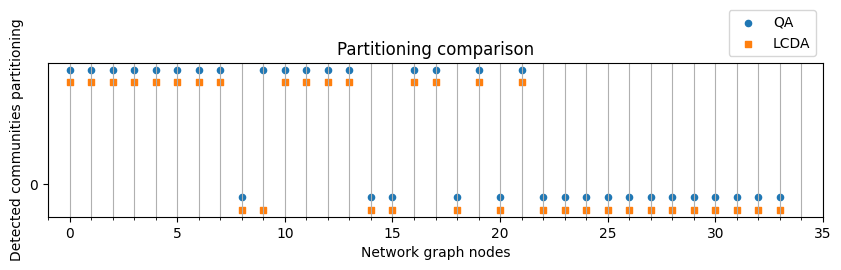

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


f, ax = plt.subplots(1, 1, figsize=(10, 2))

# Tickers
x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)

# Text annotations
ax.set_title("Partitioning comparison")
ax.set_xlabel("Network graph nodes")
ax.set_ylabel("Detected communities partitioning")

# Ticks, lims, tickers
ax.set_xticks([x for x in range(0, len(nodes) + 1, 5)])
ax.set_yticks(np.unique(values[0]).flatten())
ax.set_xlim(-1, len(nodes) + 1)
ax.xaxis.set_major_locator(x_major_ticker)
ax.xaxis.set_minor_locator(x_minor_ticker)
ax.grid(which="both", axis="x")

# Scatter
off_unit = 0.1
offsets = [off_unit * i for i in [1, 2]]
markers = ["o", "s"]
labels = ["QA", "LCDA"]
ss = [20, 20]

for i, vals in enumerate(values):
    offset, s, m, l = offsets[i], ss[i], markers[i], labels[i]
    ax.scatter(nodes, [v - offset for v in vals], s=s, marker=m, label=l)
ax.legend(loc=4, bbox_to_anchor=(1, 1));

#### Dictionary syntax

In [32]:
from QHyper.problems.community_detection import (
    CommunityDetectionProblem,
    ObjFunFormula,
)


karate_club_problem_dict = CommunityDetectionProblem(
    karate_club_network, N_communities=2, obj_func_formula=ObjFunFormula.DICT
)
karate_club_problem_dict.objective_function

{('x0', 'x1'): -0.07692307692307687, ('x0', 'x2'): 0.02564102564102555, ('x0', 'x3'): -0.3846153846153846, ('x0', 'x4'): -0.6923076923076923, ('x0', 'x5'): -0.5897435897435898, ('x0', 'x6'): -0.5897435897435898, ('x0', 'x7'): -0.5897435897435898, ('x0', 'x8'): -0.4871794871794872, ('x0', 'x9'): 0.20512820512820512, ('x0', 'x10'): -0.6923076923076923, ('x0', 'x11'): -0.8974358974358975, ('x0', 'x12'): -0.7948717948717949, ('x0', 'x13'): -0.4871794871794872, ('x0', 'x14'): 0.20512820512820512, ('x0', 'x15'): 0.20512820512820512, ('x0', 'x16'): 0.20512820512820512, ('x0', 'x17'): -0.7948717948717949, ('x0', 'x18'): 0.20512820512820512, ('x0', 'x19'): -0.6923076923076923, ('x0', 'x20'): 0.20512820512820512, ('x0', 'x21'): -0.7948717948717949, ('x0', 'x22'): 0.20512820512820512, ('x0', 'x23'): 0.5128205128205128, ('x0', 'x24'): 0.3076923076923077, ('x0', 'x25'): 0.3076923076923077, ('x0', 'x26'): 0.20512820512820512, ('x0', 'x27'): 0.41025641025641024, ('x0', 'x28'): 0.3076923076923077, ('x

In [33]:
from QHyper.solvers.dqm import DQM


karate_dqm_dict = DQM(karate_club_problem_sympy, time=5)
karate_sampleset_dqm_dict = karate_dqm_dict.solve()

In [34]:
karate_dqm_sample_dict = karate_sampleset_dqm_dict.first

In [37]:
karate_sampleset_dqm_sympy.first

Sample(sample={'x0': 1, 'x1': 1, 'x2': 1, 'x3': 1, 'x4': 1, 'x5': 1, 'x6': 1, 'x7': 1, 'x8': 0, 'x9': 1, 'x10': 1, 'x11': 1, 'x12': 1, 'x13': 1, 'x14': 0, 'x15': 0, 'x16': 1, 'x17': 1, 'x18': 0, 'x19': 1, 'x20': 0, 'x21': 1, 'x22': 0, 'x23': 0, 'x24': 0, 'x25': 0, 'x26': 0, 'x27': 0, 'x28': 0, 'x29': 0, 'x30': 0, 'x31': 0, 'x32': 0, 'x33': 0}, energy=-32.88461538461539, num_occurrences=1)

#### The same results obtained with .to_dqm() and .to_dqm_from_graph()

In [45]:
karate_communities_dqm_sympy = communities_from_sample(
    karate_dqm_sample_dict.sample, 2
)

karate_communities_dqm_dict = [
    # {"x" + str(n) for n in cluster}
    {str(n) for n in cluster}
    for cluster in karate_communities_dqm_sympy
]

print("\nDQM Sympy syntax")
print(f"comm. 0: {karate_communities_dqm_sympy[0]}")
print(f"comm. 1: {karate_communities_dqm_sympy[1]}")

print("\nDQM Dict syntax")
print(f"comm. 0: {karate_communities_dqm_dict[0]}")
print(f"comm. 1: {karate_communities_dqm_dict[1]}")

print("\nDiff.:")
print(karate_communities_dqm_dict[1].difference(karate_communities_dqm[0]))
print("Same results")


DQM Sympy syntax
comm. 0: {'x3', 'x21', 'x17', 'x9', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x19', 'x10', 'x12', 'x4', 'x7', 'x0'}
comm. 1: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x18', 'x26', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}

DQM Dict syntax
comm. 0: {'x3', 'x17', 'x21', 'x9', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x19', 'x10', 'x12', 'x4', 'x7', 'x0'}
comm. 1: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x23', 'x18', 'x28', 'x26', 'x25', 'x31', 'x15', 'x14', 'x30', 'x33', 'x24'}

Diff.:
set()
Same results


### CQM

In [46]:
from QHyper.problems.community_detection import (
    CommunityDetectionProblem,
    ObjFunFormula,
)


karate_club_problem = CommunityDetectionProblem(
    karate_club_network, N_communities=2
)
karate_club_problem.objective_function

-0.0769230769230769*x0*x1 - 0.692307692307692*x0*x10 - 0.897435897435897*x0*x11 - 0.794871794871795*x0*x12 - 0.487179487179487*x0*x13 + 0.205128205128205*x0*x14 + 0.205128205128205*x0*x15 + 0.205128205128205*x0*x16 - 0.794871794871795*x0*x17 + 0.205128205128205*x0*x18 - 0.692307692307692*x0*x19 + 0.0256410256410255*x0*x2 + 0.205128205128205*x0*x20 - 0.794871794871795*x0*x21 + 0.205128205128205*x0*x22 + 0.512820512820513*x0*x23 + 0.307692307692308*x0*x24 + 0.307692307692308*x0*x25 + 0.205128205128205*x0*x26 + 0.41025641025641*x0*x27 + 0.307692307692308*x0*x28 + 0.41025641025641*x0*x29 - 0.384615384615385*x0*x3 + 0.41025641025641*x0*x30 - 0.384615384615385*x0*x31 + 1.23076923076923*x0*x32 + 1.74358974358974*x0*x33 - 0.692307692307692*x0*x4 - 0.58974358974359*x0*x5 - 0.58974358974359*x0*x6 - 0.58974358974359*x0*x7 - 0.487179487179487*x0*x8 + 0.205128205128205*x0*x9 + 0.173076923076923*x1*x10 + 0.0576923076923077*x1*x11 + 0.115384615384615*x1*x12 - 0.711538461538462*x1*x13 + 0.115384615384

In [49]:
from QHyper.solvers.cqm import CQM


karate_cqm = CQM(karate_club_problem, time=5)
karate_cqm_sample = karate_cqm.solve()

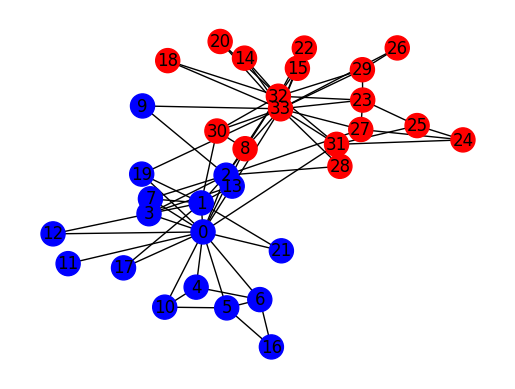

In [50]:
path = f"{folder}/{data_name}_cqm.png"
draw_communities(karate_club_problem, karate_cqm_sample, path)

Comparison with Louvain algorithm

In [51]:
karate_communities_cqm = communities_from_sample(karate_cqm_sample, 2)

lcda_communities_xs = [
    {"x" + str(n) for n in cluster} for cluster in lcda_communities
]

print("\nLCDA")
print(f"comm. 0: {lcda_communities_xs[0]}")
print(f"comm. 1: {lcda_communities_xs[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_cqm[0].difference(lcda_communities_xs[0]))


LCDA
comm. 0: {'x3', 'x17', 'x19', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x21', 'x10', 'x12', 'x4', 'x7', 'x0'}
comm. 1: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x18', 'x26', 'x9', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}

CQM
comm. 0: {'x3', 'x17', 'x19', 'x11', 'x16', 'x21', 'x5', 'x13', 'x1', 'x2', 'x6', 'x10', 'x12', 'x4', 'x7', 'x9', 'x0'}
comm. 1: {'x27', 'x32', 'x8', 'x22', 'x20', 'x29', 'x18', 'x26', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}

Diff.:
{'x9'}


The same results produced by DQM and CQM

In [52]:
print("\nDQM")
print(f"comm. 0: {karate_communities_dqm[0]}")
print(f"comm. 1: {karate_communities_dqm[1]}")

print("\nCQM")
print(f"comm. 0: {karate_communities_cqm[0]}")
print(f"comm. 1: {karate_communities_cqm[1]}")

print("\nDiff.:")
print(karate_communities_dqm[1].difference(karate_communities_cqm[0]))
print("Same results")


DQM
comm. 0: {'x27', 'x8', 'x32', 'x22', 'x20', 'x29', 'x18', 'x26', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}
comm. 1: {'x3', 'x21', 'x17', 'x9', 'x6', 'x5', 'x11', 'x16', 'x13', 'x1', 'x2', 'x19', 'x10', 'x12', 'x4', 'x7', 'x0'}

CQM
comm. 0: {'x3', 'x17', 'x19', 'x11', 'x16', 'x21', 'x5', 'x13', 'x1', 'x2', 'x6', 'x10', 'x12', 'x4', 'x7', 'x9', 'x0'}
comm. 1: {'x27', 'x32', 'x8', 'x22', 'x20', 'x29', 'x18', 'x26', 'x25', 'x30', 'x31', 'x15', 'x14', 'x33', 'x23', 'x28', 'x24'}

Diff.:
set()
Same results
